### Этап 2.1
Постройте бейзлайн моделью регрессии или классификации в зависимости от вашего кейса.
За основу возьмите базовую, простую в применении модель. Например линейную или логистическую регрессию.

Разделите обучающую выборку на обучающую и тестовую.

Обучите модель на первоначальных признаках без обработки. Признаки должны подходить для обучения.

Оцените метрики на тестовой выборке.

In [9]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


df_train = pd.read_csv('/content/train.csv')


In [11]:
#Посмотрим на столбцы и типы данных для train

df_train.head(5).style.set_properties(**{"background-color": "#A8DADC", "color": "black", "border": "1.5px solid White"})

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.300000,316.000000,3.350000,172.000000,1601.000000,179.800000,63.000000,394.000000,9.700000,3.000000,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.900000,364.000000,3.540000,63.000000,1440.000000,134.850000,88.000000,361.000000,11.000000,3.000000,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.300000,299.000000,3.550000,131.000000,1029.000000,119.350000,50.000000,199.000000,11.700000,4.000000,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.600000,256.000000,3.500000,58.000000,1653.000000,71.300000,96.000000,269.000000,10.700000,3.000000,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.100000,346.000000,3.650000,63.000000,1181.000000,125.550000,96.000000,298.000000,10.600000,4.000000,C


In [2]:
# тип столбцов
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [10]:
# Определение целевой переменной
y = df_train['Status']

# Отбор только числовых признаков
X = df_train.select_dtypes(include=['float64', 'int64'])

# Отделение целевой переменной от признаков
X = X.loc[:, (X.columns != 'Status')]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка метрик
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7685497470489039
Classification Report:
               precision    recall  f1-score   support

           C       0.77      0.91      0.83      1447
          CL       0.00      0.00      0.00        83
           D       0.77      0.59      0.67       842

    accuracy                           0.77      2372
   macro avg       0.51      0.50      0.50      2372
weighted avg       0.74      0.77      0.75      2372



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Ошибки исполнения кода связаны с тем, что модель логистической регрессии не достигает сходимости, а также с тем, что некоторые классы могут отсутствовать в предсказаниях, что вызывает предупреждения о неопределенности метрик.

### Этап 2.2.
Обучите ту же модель на данных после обработки по итогам Спринта 2.

Оцените метрики на тестовой выборке. Сделайте вывод.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_train = pd.read_csv('/content/train.csv')

# Определяем категориальные признаки
object_columns = df_train.select_dtypes(include=['object']).columns

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Конвертируем данные типа object  в численные значения:
for col in object_columns:
    df_train[col] = label_encoder.fit_transform(df_train[col])

# 1) Liver_function = Bilirubin / Albumin
df_train['Liver_function'] = df_train['Bilirubin'] / df_train['Albumin']
# 2) Inflammation = Alk_Phos / SGOT
df_train['Inflammation'] = df_train['Alk_Phos'] / df_train['SGOT']
# 3) Normal_Platelets = Platelets / Stage
df_train['Normal_Platelets'] = df_train['Platelets'] / df_train['Stage']
# 4) Normal_Albumin = Albumin / (1 + Edema)
df_train['Normal_Albumin'] = df_train['Albumin'] / (1 + df_train['Edema'])
# 5) Liver_damage = Ascites + Hepatomegaly + Spiders
df_train['Liver_damage'] = df_train['Ascites'] + df_train['Hepatomegaly'] + df_train['Spiders']

# 6) Age_Group: создание возрастных групп на основе возраста в днях
def categorize_age_in_days(age_days):
    if age_days <= 10950:  # 0-30 лет
        return 'Young'
    elif 10950 < age_days <= 18250:  # 30-50 лет
        return 'Middle_Aged'
    elif 18250 < age_days <= 25550:  # 50-70 лет
        return 'Senior'
    else:  # 70-100 лет
        return 'Elderly'

df_train['Age_Group'] = df_train['Age'].apply(categorize_age_in_days)
df_train['High_Risk'] = ((df_train['Bilirubin'] > 2) &
                          (df_train['Copper'] > 140) &
                          (df_train['Alk_Phos'] > 150)).astype(int)
df_train['ALBI'] = (np.log10(df_train['Bilirubin']) * 0.66) - (df_train['Albumin'] * 0.085)
df_train['Age_Stage_Coefficient'] = df_train['Age'] / df_train['Stage']

# Преобразование категориальных значений в числовые
df_train['Age_Group'] = label_encoder.fit_transform(df_train['Age_Group'])

# Обновляем данные для обучения и тестирования с новыми признаками
y = df_train['Status']
scaler = RobustScaler()

X_new = df_train.drop(['Status'], axis=1)
X_scaled_new = scaler.fit_transform(X_new)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# Создание и оценка модели логистической регрессии после добавления признаков
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)

# Оценка модели
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f'Accuracy (After Adding Features): {accuracy_new:.2f}')



confusion_new = confusion_matrix(y_test_new, y_pred_new)
report_new = classification_report(y_test_new, y_pred_new)

print('Confusion Matrix:\n', confusion_new)
print('Classification Report:\n', report_new)


Accuracy (After Adding Features): 0.80
Confusion Matrix:
 [[1319    0  128]
 [  49    1   33]
 [ 263    0  579]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1447
           1       1.00      0.01      0.02        83
           2       0.78      0.69      0.73       842

    accuracy                           0.80      2372
   macro avg       0.86      0.54      0.54      2372
weighted avg       0.81      0.80      0.78      2372



После преобразования данных, нормализации данных точность предсказания модели увеличилась, также как и метрики Precision и Recall.  Однако отмечается, что для класса 1 с малым числом данных точность предсказаний близка к нулю. Выведем на экран важность признаков, произведем отбор лучших, на них обучим модель. Для повышения точности модели увеличим вес для класса 1

                  Feature  Importance
26                   ALBI    0.082877
19         Liver_function    0.077945
1                  N_Days    0.076216
9               Bilirubin    0.072399
3                     Age    0.067064
12                 Copper    0.062182
14                   SGOT    0.059680
17            Prothrombin    0.045794
27  Age_Stage_Coefficient    0.043947
10            Cholesterol    0.040325
21       Normal_Platelets    0.039129
16              Platelets    0.038745
22         Normal_Albumin    0.038178
20           Inflammation    0.037733
15          Tryglicerides    0.037614
0                      id    0.036881
13               Alk_Phos    0.035141
11                Albumin    0.028914
23           Liver_damage    0.016648
24              Age_Group    0.014097
18                  Stage    0.010676
6            Hepatomegaly    0.009630
8                   Edema    0.006870
2                    Drug    0.005928
25              High_Risk    0.005249
7           

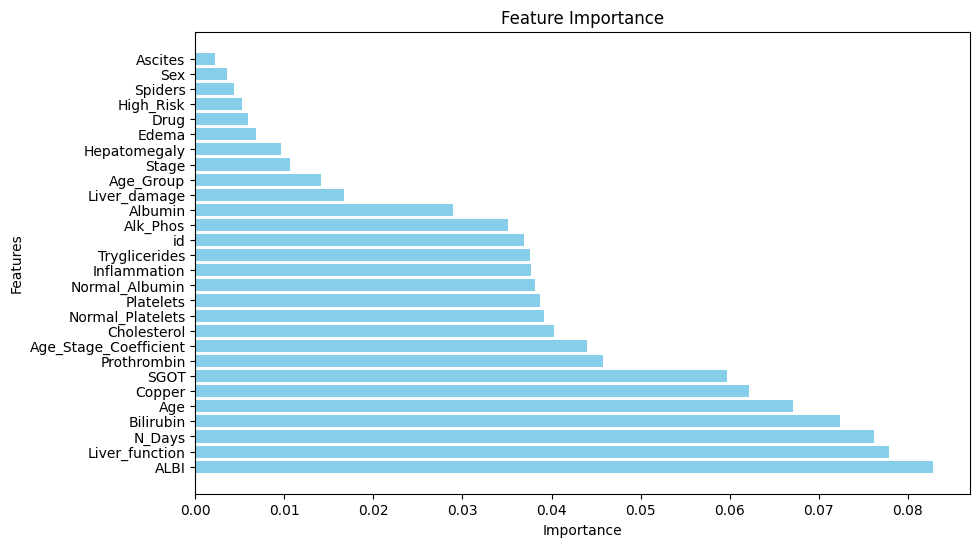

In [12]:
class_weights = {0: 1, 1: 15, 2: 1}  # Увеличиваем вес для класса 1
model_rf = RandomForestClassifier(class_weight=class_weights, random_state=42)
model_rf.fit(X_train_new, y_train_new)

importances = model_rf.feature_importances_
features = X_new.columns #Составляем DataFrame для удобного отображения
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False) #Выводим на экран важность признаков
print(importance_df) #Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')



plt.show()

Сохраним в датасете только наиболее важные признаки (опытным путем доказано, что число признаков следует принимать не более 10)

In [13]:
# Сохраняем только нужные признаки
desired_columns = [
    'N_Days', 'Liver_function', 'ALBI',
    'Bilirubin', 'Prothrombin', 'Copper',
    'Normal_Albumin', 'Age', 'SGOT', 'Normal_Platelets'
]
df_train_reduced = df_train[desired_columns + ['Status']]

# Разделение на обучающую и тестовую выборки
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(df_train_reduced, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса на отобранных признаках
model_rf_selected = RandomForestClassifier(class_weight=class_weights, random_state=42)
model_rf_selected.fit(X_train_selected, y_train_selected)

# Прогнозирование
y_pred_selected = model_rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
print(f'Accuracy (After Feature Selection): {accuracy_selected:.2f}')

confusion_selected = confusion_matrix(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected)

print('Confusion Matrix:\n', confusion_selected)
print('Classification Report:\n', report_selected)

Accuracy (After Feature Selection): 1.00
Confusion Matrix:
 [[966   0   0]
 [  0  52   0]
 [  0   0 563]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00       563

    accuracy                           1.00      1581
   macro avg       1.00      1.00      1.00      1581
weighted avg       1.00      1.00      1.00      1581



По результатам модификации кода метрики показывают 100% точность предсказаний моделью, что подлежит проверке.


In [19]:
df_train_reduced.head(5).style.set_properties(**{"background-color": "#A8DADC", "color": "black", "border": "1.5px solid White"})

,N_Days,Liver_function,ALBI,Bilirubin,Prothrombin,Copper,Normal_Albumin,Age,SGOT,Normal_Platelets,Status
0,999,0.686567,-0.046010,2.300000,9.700000,172.000000,3.350000,21532,179.800000,131.333333,2
1,2574,0.254237,-0.331100,0.900000,11.000000,63.000000,3.540000,19237,134.850000,120.333333,0
2,3428,0.929577,0.040469,3.300000,11.700000,131.000000,1.183333,13727,119.350000,49.750000,2
3,2576,0.171429,-0.443920,0.600000,10.700000,58.000000,3.500000,18460,71.300000,89.666667,0
4,788,0.301370,-0.282931,1.100000,10.600000,63.000000,3.650000,16658,125.550000,74.500000,0


### Этап 3.
Примените основные методы по определению выбросов в данных.

Примените статистический подход по поиску выбросов.

Примените DBSCAN по поиску выбросов.

Удалите найденные выбросы и обучите модель из Этапа 2. Оцените метрики.
Сделайте вывод.


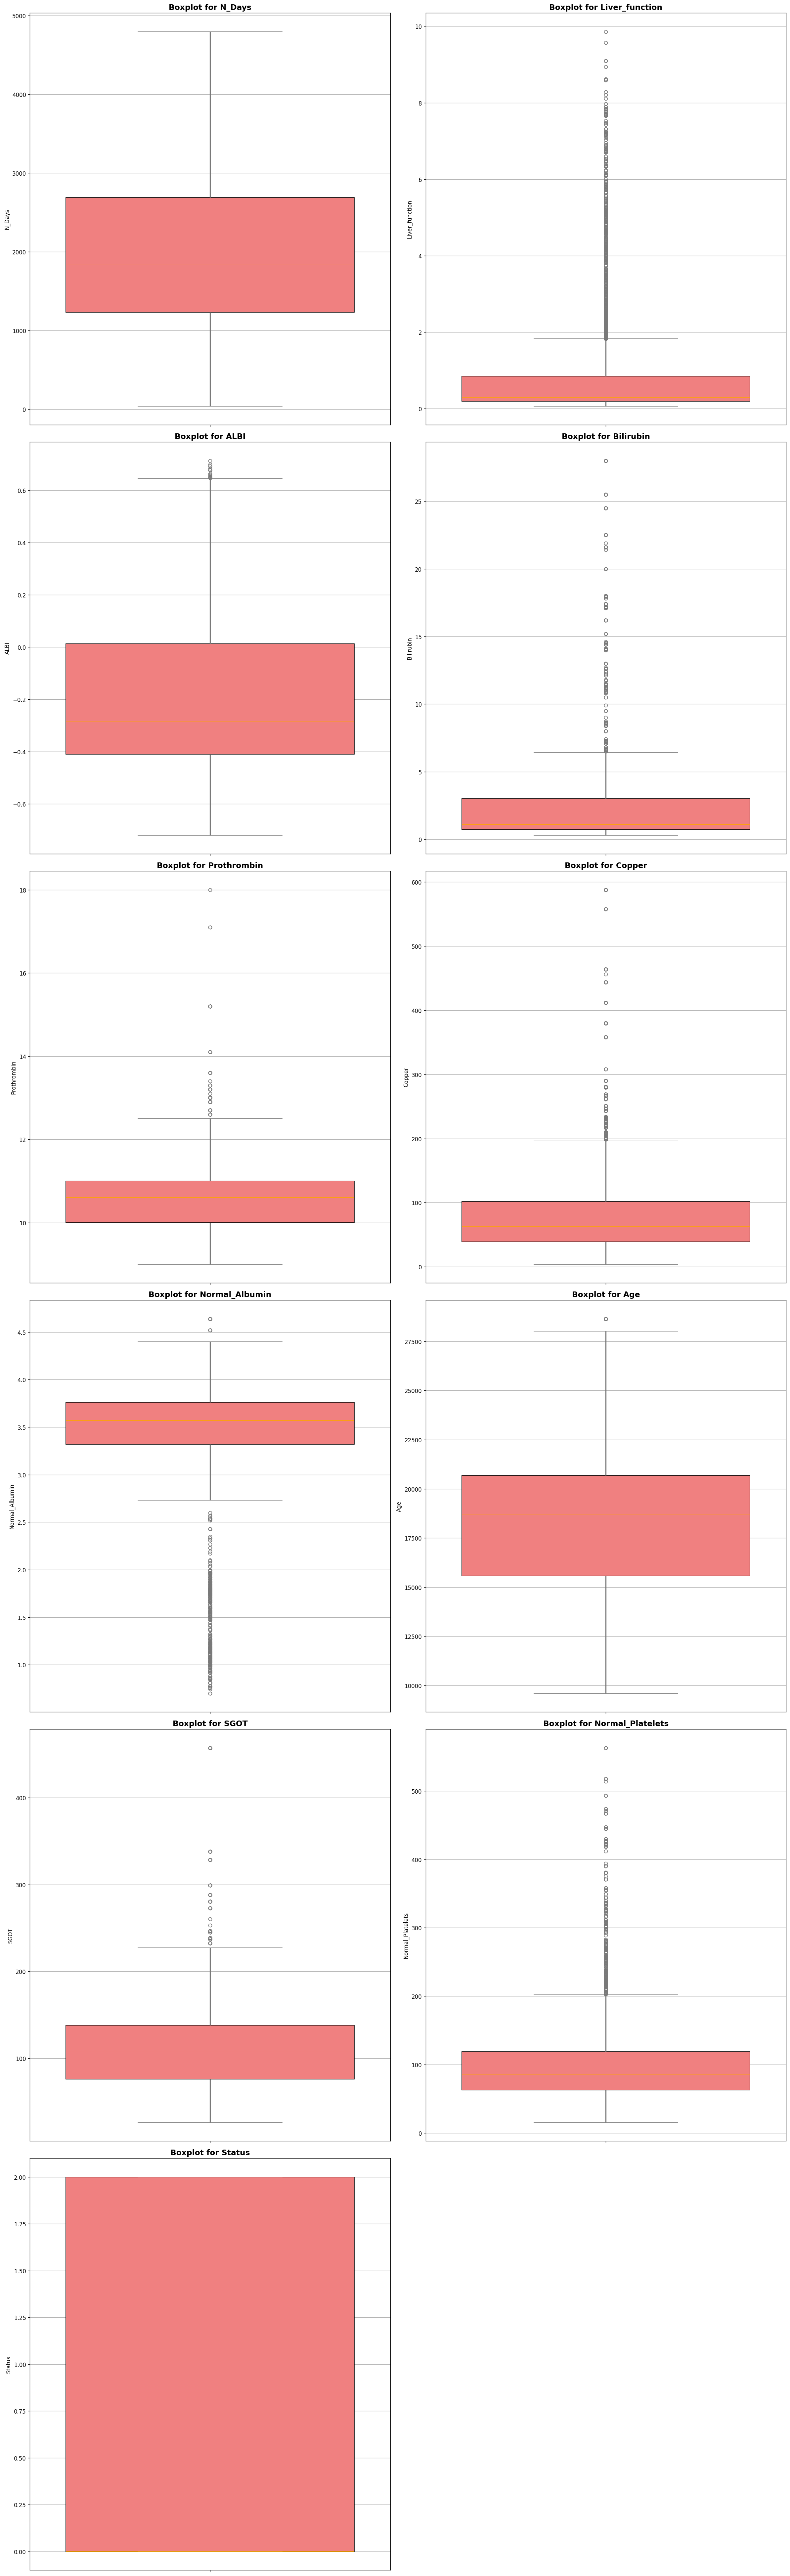

Выбросы в признаке N_Days:
Empty DataFrame
Columns: [N_Days, Liver_function, ALBI, Bilirubin, Prothrombin, Copper, Normal_Albumin, Age, SGOT, Normal_Platelets, Status]
Index: []
Выбросы в признаке Liver_function:
      N_Days  Liver_function      ALBI  Bilirubin  Prothrombin  Copper  \
21       326        2.185430  0.284199        6.6         12.1   199.0   
29       943        8.588957  0.678024       28.0         10.2    39.0   
54        51        4.598540  0.493345       12.6         11.5   140.0   
59      2769        2.638037  0.339669        8.6         10.7    84.0   
80       769        3.655352  0.430895       14.0         11.4   251.0   
...      ...             ...       ...        ...          ...     ...   
7868     769        7.244318  0.629117       25.5         11.5   219.0   
7873    1592        6.952790  0.600230       16.2         11.1   182.0   
7879     131        6.732283  0.597877       17.1         12.4   588.0   
7886     191        2.142857  0.279099        6

In [14]:
# Определение числовых признаков
numeric_cols = df_train_reduced.select_dtypes(include=['float64', 'int64']).columns

# Построение графика "ящик с усами"
plt.figure(figsize=(20, 65), dpi=120)  # Увеличение размера графика и разрешения
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i + 1)
    sns.boxplot(y=df_train_reduced[col], color='lightblue', whiskerprops={'linewidth': 2},
                boxprops={'facecolor': 'lightcoral', 'edgecolor': 'black'},
                medianprops={'color': 'orange'})
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')  # Улучшение заголовка
    plt.xlabel('')  # Убрать метку по оси X
    plt.grid(axis='y')  # Добавление сетки для лучшей читабельности

plt.tight_layout()
plt.show()

# Фиксация выбросов
outliers = {}
for col in numeric_cols:
    Q1 = df_train_reduced[col].quantile(0.25)
    Q3 = df_train_reduced[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df_train_reduced[(df_train_reduced[col] < lower_bound) | (df_train_reduced[col] > upper_bound)]

# Вывод выбросов
for col, outlier_df_train_reduced in outliers.items():
    print(f'Выбросы в признаке {col}:')
    print(outlier_df_train_reduced)

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


print(df_train_reduced.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение DBSCAN
dbscan_1_5 = DBSCAN(eps=1.5, min_samples=2)
labels_1_5 = dbscan_1_5.fit_predict(X_scaled)
print("Число выбросов при eps=1.5:", sum(labels_1_5 == -1))

dbscan_3 = DBSCAN(eps=3, min_samples=2)
labels_3 = dbscan_3.fit_predict(X_scaled)
print("Число выбросов при eps=3:", sum(labels_3 == -1))
# Добавление результатов в DataFrame
df_train_reduced['Cluster'] = labels_1_5

# Определение выбросов
outliers = df_train_reduced[df_train_reduced['Cluster'] == -1]

print("Выбросы в данных при eps=1.5:")
print(outliers)

(7905, 11)
Число выбросов при eps=1.5: 2966
Число выбросов при eps=3: 121
Выбросы в данных при eps=1.5:
      N_Days  Liver_function      ALBI  Bilirubin  Prothrombin  Copper  \
5        703        0.173410 -0.440520        0.6         11.5    34.0   
10      3581        0.138889 -0.504680        0.5         10.0    26.0   
14       904        1.218750  0.118103        3.9         10.0    13.0   
20      3092        0.193548 -0.409920        0.6         10.6    70.0   
24      3577        0.148883 -0.488970        0.6          9.9    38.0   
...      ...             ...       ...        ...          ...     ...   
7894     935        1.238390  0.122810        4.0         11.5   219.0   
7895    1433        0.117925 -0.559080        0.5         10.6    37.0   
7897    1455        0.963173  0.050726        3.4          9.8   143.0   
7898      77        1.854545  0.233246        5.1         12.3   464.0   
7902    1576        0.626959 -0.072470        2.0         12.7    51.0   

      N

<ipython-input-16-007477d413be>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_reduced['Cluster'] = labels_1_5


In [18]:
# Удаление выбросов
df_train_cleaned = df_train_reduced[df_train_reduced['Cluster'] != -1].copy()

# Обратите внимание, что вам нужно определить y в соответствии с вашим набором данных
y = df_train_cleaned['Status']  # Предположим, что 'Status' это целевая переменная
df_train_cleaned = df_train_cleaned[desired_columns]  # Исходя из ваших признаков

# Разделение на обучающую и тестовую выборки
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(df_train_cleaned, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса на отобранных признаках
class_weights = {0: 1, 1: 15, 2: 1}  # Увеличиваем вес для класса 1
model_rf_selected = RandomForestClassifier(class_weight=class_weights, random_state=42)  # Убедитесь, что class_weights определены, если это необходимо
model_rf_selected.fit(X_train_selected, y_train_selected)

# Прогнозирование
y_pred_selected = model_rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
print(f'Accuracy (After Feature Selection): {accuracy_selected:.2f}')

confusion_selected = confusion_matrix(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected)

print('Confusion Matrix:\n', confusion_selected)
print('Classification Report:\n', report_selected)

Accuracy (After Feature Selection): 0.86
Confusion Matrix:
 [[705   1  23]
 [ 17   3   5]
 [ 89   1 144]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       729
           1       0.60      0.12      0.20        25
           2       0.84      0.62      0.71       234

    accuracy                           0.86       988
   macro avg       0.77      0.57      0.61       988
weighted avg       0.85      0.86      0.85       988

